In [4]:
print("kernel is ready")

kernel is ready

In [5]:
using Plots

In [6]:
const RMAX = 1
const OMEGA = 1
const DT = 0.01
# const NTIME = 2*pi/(OMEGA*DT)
const NTIME = 500
const RESOLUTION = 10000
const SISTEPS = 0.1
const FRAMERATE = 30 

30

calculating...


┌ Info: Saved animation to 
│   fn = /jh-sharedNotebooks/fluidFlowDemonstration/freeVortex/ResultCrossElement2.gif
└ @ Plots /usr/share/julia/packages/Plots/Xnzc7/src/animation.jl:104


Plots.AnimatedGif("/jh-sharedNotebooks/fluidFlowDemonstration/freeVortex/ResultCrossElement2.gif")
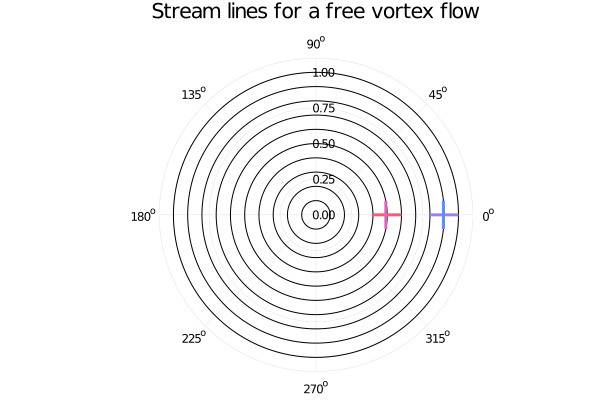

In [7]:
mutable struct Marker
    r0::Float64
    t0::Float64
    r::Float64
    t::Float64
    rs1::Float64
    rf1::Float64
    ts1::Float64
    tf1::Float64
    rs2::Float64
    rf2::Float64
    ts2::Float64
    tf2::Float64
end


function makeMarker(r0, t0, l1, l2)
    rs1 = r0 + l1/2
    rf1 = r0 - l1/2
    ts1 = t0 
    tf1 = t0 

    rs2 = r0 
    rf2 = r0 
    te = atan(l2/(2*r0))
    ts2 = t0 - te
    tf2 = t0 + te
    return Marker(r0, r0, l1, l2, rs1, rf1, ts1, tf1, rs2, rf2, ts2, tf2)
end

makeMarker(x, y) = makeMarker(x, y, 0.2, 0.2)

function plotMarker!(p,m::Marker)
    Plots.plot!(p,[m.ts1,m.tf1],[m.rs1,m.rf1],legend = false, proj = :polar,linewidth = 3)
    Plots.plot!(p,[m.ts2,m.tf2],[m.rs2,m.rf2],legend = false, proj = :polar, linewidth = 3)
end



function rdot(r,t)
    return 0
end

function tdot(r,t)
    return 1/r
end

function moveMarker!(m,dt)
    drs1 = rdot(m.rs1,m.ts1) * dt
    dts1 = tdot(m.rs1,m.ts1) * dt

    drf1 = rdot(m.rf1,m.tf1) * dt
    dtf1 = tdot(m.rf1,m.tf1) * dt

    m.rs1 = m.rs1 + drs1
    m.ts1 = m.ts1 + dts1 

    m.rf1 = m.rf1 + drf1
    m.tf1 = m.tf1 + dtf1

    drs2 = rdot(m.rs2,m.ts2) * dt
    drf2 = rdot(m.rf2,m.tf2) * dt
    dts2 = tdot(m.rs2,m.ts2) * dt
    dtf2 = tdot(m.rf2,m.tf2) * dt
    
    m.rs2 = m.rs2 + drs2
    m.rf2 = m.rf2 + drf2
    m.ts2 = m.ts2 + dts2 
    m.tf2 = m.tf2 + dtf2

    return m
end

function plotSi!(p,steps)
    t = collect(0 : (2*pi)/RESOLUTION : 2*pi)
    for rr = 0:steps:RMAX
        r = [rr for i in t]
        plot!(p,t,r,proj = :polar, legend = false, color = :black)
    end
    return p
end
function plotSiSec(p,rr)
    t = collect(0 : (2*pi)/RESOLUTION : 2*pi)
    r = [rr for i in t] 
    plot!(p,t,r,proj = :polar, legend = false, color = :black)
end


function main()
    
    markers = []
    # ====================== ADD MARKERS HERE =================
    # marker(r,θ (rad),first arm lenght, second arm lenght)
    push!(markers,makeMarker(.9, 0, .2, .2)) # example with length
    # push!(markers,makeMarker(.9, pi/2, .2, .2))
    # push!(markers,makeMarker(.9, -pi/2))
    # push!(markers,makeMarker(.9, pi))
    push!(markers,makeMarker(.5, 0, .2, .2)) # example with length
    # push!(markers,makeMarker(.5, pi/2, .2, .2))
    # push!(markers,makeMarker(.5, -pi/2))
    # push!(markers,makeMarker(.5, pi))
    # =========================================================

    println("calculating...")
    anim = @animate for nt = 0:NTIME
        p1 =  plot(title = "Stream lines for a free vortex flow", proj = :polar)
        plotSi!(p1,SISTEPS)

        for m in markers
            plotMarker!(p1,m)
            m = moveMarker!(m,DT)
        end

    end
    gif(anim, "ResultCrossElement2.gif", fps = FRAMERATE)

end

main()